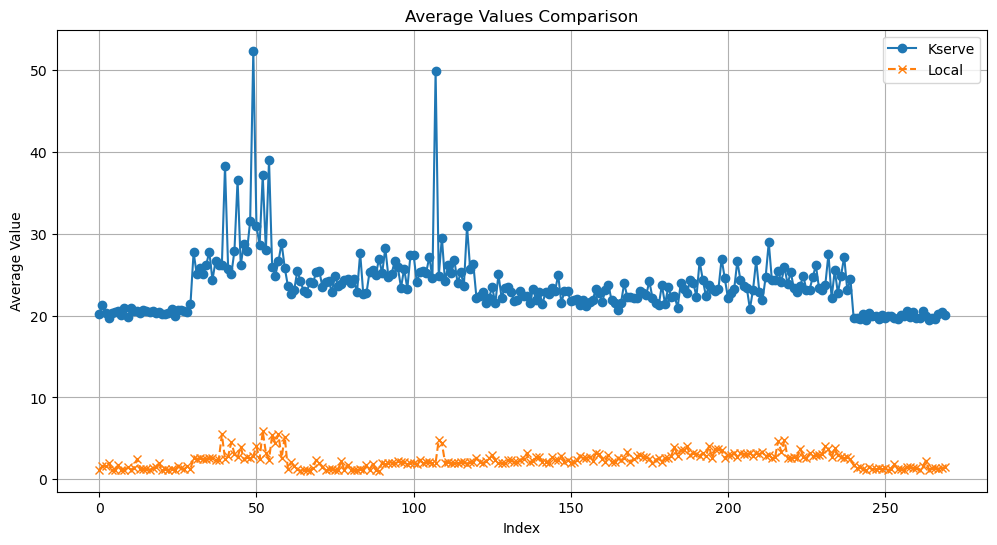

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_and_plot_average(dir1, dir2, output_file="comparison_plot.png"):
    """
    Extracts the 'Average' column from all CSV files in two directories
    and plots the values from both directories for comparison.
    
    Args:
        dir1 (str): Path to the first directory containing CSV files.
        dir2 (str): Path to the second directory containing CSV files.
    """
    def extract_average_values(directory):
        """Extracts 'Average' column values from all CSV files in a directory."""
        values = []
        for file in os.listdir(directory):
            if file.endswith(".csv"):
                file_path = os.path.join(directory, file)
                try:
                    # Read the CSV file
                    df = pd.read_csv(file_path)

                    # Check if 'Average' column exists
                    if 'Average' in df.columns:
                        values.extend(df['Average'].tolist())
                    else:
                        print(f"'Average' column not found in {file}")
                except Exception as e:
                    print(f"Error reading {file}: {e}")
        return values

    # Extract values from both directories
    avg_values_dir1 = extract_average_values(dir1)
    avg_values_dir2 = extract_average_values(dir2)

    # Plot the values
    plt.figure(figsize=(12, 6))
    plt.plot(avg_values_dir1, marker='o', linestyle='-', label="Kserve")
    plt.plot(avg_values_dir2, marker='x', linestyle='--', label="Local")
    plt.title("Average Values Comparison")
    plt.xlabel("Index")
    plt.ylabel("Average Value")
    plt.legend()
    plt.grid(True)
    plt.savefig(output_file, format='png', dpi=300)
    plt.show()

# Example usage
directory1 = "kserve/results/csv"
directory2 = "local/results/csv"
extract_and_plot_average(directory1, directory2)
